In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv("../data/BAAC_MASTER_2019_2024.csv",sep=";",low_memory=False, encoding='utf-8')
df.head()


,num_acc,actp,an_nais,annee,catu,etatp,grav,id_usager,id_vehicule,locp,...,pr,pr1,prof,situ,surf,v1,v2,vma,voie,vosp
0,201900000001,-1,2002.0,2019,2,-1,4,NaN,138306524,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
1,201900000001,-1,1993.0,2019,1,-1,4,NaN,138306524,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
2,201900000001,-1,1959.0,2019,1,-1,1,NaN,138306525,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
3,201900000002,-1,1994.0,2019,1,-1,4,NaN,138306523,-1,...,3,845,4,1,1,0.0,NaN,70,1,0
4,201900000003,0,1996.0,2019,1,-1,1,NaN,138306520,-1,...,10,500,1,1,1,0.0,NaN,90,86,0


In [5]:
df.shape

(820413, 58)

In [7]:
df.dtypes

num_acc           int64
actp             object
an_nais         float64
annee             int64
catu              int64
etatp             int64
grav              int64
id_usager       float64
id_vehicule       int64
locp              int64
num_veh_usag     object
place             int64
secu1             int64
secu2             int64
secu3             int64
sexe              int64
trajet            int64
catv              int64
choc              int64
manv              int64
motor             int64
num_veh_veh      object
obs               int64
obsm              int64
occutc          float64
senc              int64
accident_id     float64
adr              object
agg             float64
an              float64
atm             float64
col             float64
com              object
dep              object
hrmn             object
int             float64
jour            float64
lat              object
long             object
lum             float64
mois            float64
catr            

In [9]:
df.columns

Index(['num_acc', 'actp', 'an_nais', 'annee', 'catu', 'etatp', 'grav',
       'id_usager', 'id_vehicule', 'locp', 'num_veh_usag', 'place', 'secu1',
       'secu2', 'secu3', 'sexe', 'trajet', 'catv', 'choc', 'manv', 'motor',
       'num_veh_veh', 'obs', 'obsm', 'occutc', 'senc', 'accident_id', 'adr',
       'agg', 'an', 'atm', 'col', 'com', 'dep', 'hrmn', 'int', 'jour', 'lat',
       'long', 'lum', 'mois', 'catr', 'circ', 'infra', 'larrout', 'lartpc',
       'nbv', 'plan', 'pr', 'pr1', 'prof', 'situ', 'surf', 'v1', 'v2', 'vma',
       'voie', 'vosp'],
      dtype='object')

### DISTRIBUTION DE LA GRAVITÉ DES ACCIDENTS

In [262]:
print(">> Répartition de la gravité des blessures (en %)")
print((df["grav"].value_counts(normalize=True) * 100).round(2).sort_index())

print("\n>> Répartition de la gravité (en effectifs)")
print(df["grav"].value_counts().sort_index())

>> Répartition de la gravité des blessures (en %)
grav
-1     0.06
 1    42.45
 2     2.55
 3    15.04
 4    39.90
Name: proportion, dtype: float64

>> Répartition de la gravité (en effectifs)
grav
-1       457
 1    348299
 2     20880
 3    123399
 4    327378
Name: count, dtype: int64


On supprime pour les accidents non renseignés

In [264]:
df = df[df["grav"] != -1]

# Étude des valeurs manquantes

In [266]:
df.isna().sum().sort_values(ascending=False)

accident_id     819956
lartpc          819161
occutc          808146
v2              753049
nbv             367460
id_usager       238272
adr             140708
larrout         132977
jour            126421
long            126421
lat             126421
an              126421
mois            126421
agg             126421
int             126421
atm             126421
col             126421
com             126421
lum             126421
dep             126421
hrmn            126421
voie            105300
v1               24596
an_nais          12456
catr                 0
circ                 0
plan                 0
pr                   0
pr1                  0
prof                 0
situ                 0
surf                 0
vma                  0
infra                0
num_acc              0
actp                 0
secu2                0
annee                0
catu                 0
etatp                0
grav                 0
id_vehicule          0
locp                 0
num_veh_usa

In [22]:
df.isna().mean()*100

num_acc           0.000000
actp              0.000000
an_nais           1.573841
annee             0.000000
catu              0.000000
etatp             0.000000
grav              0.000000
id_usager        29.042933
id_vehicule       0.000000
locp              0.000000
num_veh_usag      0.000000
place             0.000000
secu1             0.000000
secu2             0.000000
secu3             0.000000
sexe              0.000000
trajet            0.000000
catv              0.000000
choc              0.000000
manv              0.000000
motor             0.000000
num_veh_veh       0.000000
obs               0.000000
obsm              0.000000
occutc           98.559872
senc              0.000000
accident_id     100.000000
adr              17.180737
agg              15.438809
an               15.438809
atm              15.438809
col              15.438809
com              15.438809
dep              15.438809
hrmn             15.438809
int              15.438809
jour             15.438809
l

On supprime les données dont les valeurs manquantes en moyenne sont supérieures à 90%

In [268]:
#  - créer presence_bande_cyclable = 1 si lartpc renseignée, 0 sinon
#  - supprimer lartpc
#  - supprimer v2
#  - supprimer voie
# -----------------------------
# Création indicateur bande/piste cyclable
if "lartpc" in df.columns:
    df["presence_bande_cyclable"] = df["lartpc"].notna().astype(int)
    df = df.drop(columns=["lartpc"])

# Suppression variables très manquantes / textuelles
cols_to_drop_df = [c for c in ["v2", "voie"] if c in df.columns]
if len(cols_to_drop_df) > 0:
    df = df.drop(columns=cols_to_drop_df)

In [270]:
# Suppression de la variable texte "adr" (peu exploitable + valeurs manquantes)
if "adr" in df.columns:
    df = df.drop(columns=["adr"])

In [272]:
# Décisions :
#  - transformer an_nais -> age
#  - corriger années incohérentes (optionnel mais recommandé)
#  - imputer age manquant par la médiane
#  - supprimer an_nais après création de age
# -----------------------------
CURRENT_YEAR = 2024 #dernier jeu de données
if "an_nais" in df.columns:
    # Convertir en numérique (au cas où)
    df["an_nais"] = pd.to_numeric(df["an_nais"], errors="coerce")

    # Remplacer les années incohérentes par NaN (seuils simples et défendables)
    df.loc[(df["an_nais"] < 1900) | (df["an_nais"] > CURRENT_YEAR), "an_nais"] = np.nan

    # Créer l'âge (approx)
    df["age"] = CURRENT_YEAR - df["an_nais"]

    # Imputation de l'âge par la médiane (sur l'ensemble)
    age_median = df["age"].median()
    df["age"] = df["age"].fillna(age_median)

    # supprimer an_nais (on garde uniquement age pour le ML)
    df = df.drop(columns=["an_nais"])

In [274]:
# Décision : supprimer occutc
# -----------------------------
if "occutc" in df.columns:
    df = df.drop(columns=["occutc"])

# Vérification des outliers

In [276]:
# 2) Détection d'outliers sur variables numériques (IQR)
num_cols = df.select_dtypes(include="number").columns

outlier_rows = []
for col in num_cols:
    s = df[col].dropna()
    # On ignore les colonnes constantes ou trop pauvres
    if s.nunique() <= 1:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        continue
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_rows.append((col, int(n_out), round(100 * n_out / df.shape[0], 3)))

outliers = pd.DataFrame(outlier_rows, columns=["variable", "n_outliers", "pct_outliers"]).sort_values(
    by="n_outliers", ascending=False
)

print("\nOutliers (IQR) – variables numériques :")
print(outliers if len(outliers) > 0 else "Aucun outlier détecté (selon IQR) ou pas de variables numériques pertinentes.")



Outliers (IQR) – variables numériques :
       variable  n_outliers  pct_outliers
12         catv      236413        28.832
9         secu2      174792        21.317
24         catr      120124        14.650
8         secu1      114611        13.978
7         place      102628        12.516
6          locp       55290         6.743
25          vma       46148         5.628
20          int       37417         4.563
15         obsm       14939         1.822
13         choc       12544         1.530
10         sexe       11828         1.443
16         senc        1921         0.234
26          age         879         0.107
1         annee           0         0.000
14         manv           0         0.000
11       trajet           0         0.000
5   id_vehicule           0         0.000
17          agg           0         0.000
18           an           0         0.000
19          col           0         0.000
4     id_usager           0         0.000
21         jour           0        

In [278]:
print("=== df : vérif 'vma' ===")
print(df["vma"].describe())

print("\nValeurs les plus fréquentes :")
print(df["vma"].value_counts(dropna=False).head(20))

print("\nValeurs suspectes (ex: <=0 ou >130) :")
print("<=0 :", (df["vma"] <= 0).sum())
print(">130 :", (df["vma"] > 130).sum())

print("\nExemples de valeurs >130 :")
print(df.loc[df["vma"] > 130, ["num_acc", "vma"]].head(10))

=== df : vérif 'vma' ===
count    819956.000000
mean         58.453551
std          26.474095
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         901.000000
Name: vma, dtype: float64

Valeurs les plus fréquentes :
vma
 50     397431
 80     108579
 30     106204
 90      63902
 70      58844
 110     30780
-1       25760
 130     19826
 20       2324
 60       1963
 10       1317
 40        739
 25        409
 15        400
 5         306
 45        249
 100       194
 1         157
 500       146
 2         121
Name: count, dtype: int64

Valeurs suspectes (ex: <=0 ou >130) :
<=0 : 25764
>130 : 225

Exemples de valeurs >130 :
            num_acc  vma
10061  201900004475  500
10062  201900004475  500
38092  201900016900  500
38093  201900016900  500
40776  201900018073  500
40777  201900018073  500
40778  201900018073  500
41528  201900018414  560
41529  201900018414  560
41530  201900018414  560


In [280]:
print("=== CARACERISTIQUES : vérif modalités 'int' ===")
print("Nb modalités distinctes :", df["int"].nunique())
print("Top modalités :")
print(df["int"].value_counts(dropna=False).head(20).sort_index())

print("\nMin/Max (pour détecter valeurs absurdes) :")
print("min:", df["int"].min(), "max:", df["int"].max())

=== CARACERISTIQUES : vérif modalités 'int' ===
Nb modalités distinctes : 10
Top modalités :
int
-1.0        12
 1.0    394161
 2.0    111036
 3.0     97653
 4.0     18262
 5.0      4917
 6.0     30077
 7.0      6782
 8.0      1569
 9.0     29066
 NaN    126421
Name: count, dtype: int64

Min/Max (pour détecter valeurs absurdes) :
min: -1.0 max: 9.0


In [282]:
print("=== vérif 'vma' ===")
print(df["vma"].describe())

print("\nValeurs les plus fréquentes :")
print(df["vma"].value_counts(dropna=False).head(20))

print("\nValeurs suspectes (ex: <=0 ou >130) :")
print("<=0 :", (df["vma"] <= 0).sum())
print(">130 :", (df["vma"] > 130).sum())

print("\nExemples de valeurs >130 :")
print(df.loc[df["vma"] > 130, ["num_acc", "vma"]].head(10))

=== vérif 'vma' ===
count    819956.000000
mean         58.453551
std          26.474095
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         901.000000
Name: vma, dtype: float64

Valeurs les plus fréquentes :
vma
 50     397431
 80     108579
 30     106204
 90      63902
 70      58844
 110     30780
-1       25760
 130     19826
 20       2324
 60       1963
 10       1317
 40        739
 25        409
 15        400
 5         306
 45        249
 100       194
 1         157
 500       146
 2         121
Name: count, dtype: int64

Valeurs suspectes (ex: <=0 ou >130) :
<=0 : 25764
>130 : 225

Exemples de valeurs >130 :
            num_acc  vma
10061  201900004475  500
10062  201900004475  500
38092  201900016900  500
38093  201900016900  500
40776  201900018073  500
40777  201900018073  500
40778  201900018073  500
41528  201900018414  560
41529  201900018414  560
41530  201900018414  560


In [284]:
print("===  contrôles de cohérence (codes) ===")
for c in ["secu1", "secu2", "place", "locp", "sexe"]:
    print(f"\n--- {c} ---")
    print("nunique:", df[c].nunique(dropna=False))
    print("top modalités:")
    print(df[c].value_counts(dropna=False).head(15))

print("\n=== df : vérif age (après transformation) ===")
print(df["age"].describe())
print("Age <0 :", (df["age"] < 0).sum())
print("Age >110 :", (df["age"] > 110).sum())

===  contrôles de cohérence (codes) ===

--- secu1 ---
nunique: 11
top modalités:
secu1
 1    479202
 2    149383
 8    101107
 0     71800
-1     11099
 3      4960
 9       844
 6       730
 4       531
 5       282
 7        18
Name: count, dtype: int64

--- secu2 ---
nunique: 11
top modalités:
secu2
-1    330955
 0    312746
 8     76221
 6     76021
 5      8743
 4      8067
 9      2554
 1      1463
 2      1153
 3      1024
 7      1009
Name: count, dtype: int64

--- place ---
nunique: 11
top modalités:
place
 1     609682
 2      91872
 10     62797
 3      15774
 4      14580
 9       8294
 7       7729
 5       4518
 8       3580
 6       1121
-1          9
Name: count, dtype: int64

--- locp ---
nunique: 11
top modalités:
locp
-1    383652
 0    372235
 3     20387
 2     13632
 4     10533
 1      8779
 5      4973
 9      3016
 6      1812
 8       870
 7        67
Name: count, dtype: int64

--- sexe ---
nunique: 3
top modalités:
sexe
 1    551793
 2    256335
-1     11828

In [286]:
print("===  contrôles de cohérence ===")
for c in ["catv", "choc", "obsm", "senc", "manv"]:
    print(f"\n--- {c} ---")
    print("nunique:", df[c].nunique(dropna=False))
    print("top modalités:")
    print(df[c].value_counts(dropna=False).head(15))


===  contrôles de cohérence ===

--- catv ---
nunique: 32
top modalités:
catv
7     512688
10     57549
33     55547
1      37882
2      26492
30     21339
32     15915
50     14633
31     12466
37      8425
34      7726
15      6229
14      5333
3       4971
80      4548
Name: count, dtype: int64

--- choc ---
nunique: 11
top modalités:
choc
 1    299812
 3    123849
 2    107051
 4     76680
 8     53995
 7     48072
 0     47059
 6     27620
 5     22901
 9     12544
-1       373
Name: count, dtype: int64

--- obsm ---
nunique: 8
top modalités:
obsm
 2    534950
 0    151541
 1    118526
 9     11529
 6      1642
 4       820
 5       618
-1       330
Name: count, dtype: int64

--- senc ---
nunique: 5
top modalités:
senc
 1    365996
 2    277014
 3    125462
 0     49563
-1      1921
Name: count, dtype: int64

--- manv ---
nunique: 28
top modalités:
manv
1     349174
2      85336
15     70254
0      48742
13     33261
26     26883
17     25356
16     23936
9      23625
19     21364

In [288]:
# ---  traitement vma (sans NaN) ---
# Règle : vma == -1 ou vma > 130 -> imputation par la médiane des valeurs plausibles

vma_valid = df.loc[(df["vma"] > 0) & (df["vma"] <= 130), "vma"]
vma_median = vma_valid.median()

df.loc[df["vma"] <= 0, "vma"] = vma_median      # inclut -1
df.loc[df["vma"] > 130, "vma"] = vma_median

print("vma_median utilisée :", vma_median)
print("Nb valeurs <=0 après :", (df["vma"] <= 0).sum())
print("Nb valeurs >130 après :", (df["vma"] > 130).sum())

vma_median utilisée : 50.0
Nb valeurs <=0 après : 0
Nb valeurs >130 après : 0


In [290]:
def replace_minus_one_with_mode_valid(df, cols, label):
    print(f"=== {label} : remplacement -1 par mode (hors -1) ===")
    for c in cols:
        if c not in df.columns:
            continue
        # Si pas de -1, on ne fait rien
        n_minus1 = (df[c] == -1).sum() if pd.api.types.is_numeric_dtype(df[c]) else 0
        if n_minus1 == 0:
            continue

        # Mode sur valeurs valides (≠ -1)
        valid = df.loc[df[c] != -1, c]
        if valid.shape[0] == 0:
            continue  # cas extrême (tout est -1)

        mode_valid = valid.mode(dropna=True)
        if mode_valid.empty:
            continue

        fill_value = mode_valid.iloc[0]
        df.loc[df[c] == -1, c] = fill_value
        print(f"{c}: -1={n_minus1} -> remplacé par {fill_value}")

# Colonnes à traiter (ajuste si tu veux)
cols= ["sexe", "secu1", "secu2", "secu3", "place", "locp", "actp", "etatp", "trajet","choc", "obsm", "senc", "obs", "manv", "catv", "motor"]

replace_minus_one_with_mode_valid(df, col, "Traitement")



=== Traitement : remplacement -1 par mode (hors -1) ===


## Carte des accidents

In [108]:
# pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/54/e4/fac19dc34cb686c96011388b813ff7b858a70681e5ce6ce7698e5021b0f4/geopandas-1.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/34/97/e8f2ed8a339152b86f8403c258ae5d5f23ab32d690eeb0545bb3473d0c69/pyogrio-0.12.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/38/1e/3f8ea46353c2a33c1669eb7327f9665103aa3a8dfe7f2e4ef714c210b2c2/shapely-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/341.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/341.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/341.7 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/341.7 kB 393.8 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/341.7 kB 655.4 kB/s eta

In [112]:
# pip install contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/6a/bb/6c824d0da874eef900ecf0a71e0889f0d4624560b0160fd9e333a146ee4f/contextily-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/66/d0/3818859ddbd3750d0ef5a6580a3272e81764286d943c689dd41e49b8b786/rasterio-1.4.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=3.0 from https://files.pythonhosted.org/packages/98/78/01c019cdb5d6498122777c1a43056ebb3ebfeef2076d9d026bfe15583b2b/click-8.3.1-py3-none-

In [118]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz

In [88]:
# forcer en string
df["lat"] = df["lat"].astype(str)
df["long"] = df["long"].astype(str)

# remplacer virgule par point
df["lat"] = df["lat"].str.replace(",", ".", regex=False)
df["long"] = df["long"].str.replace(",", ".", regex=False)

# convertir en numérique
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")
df["long"] = pd.to_numeric(df["long"], errors="coerce")
df = df.dropna(subset=["lat","long"])

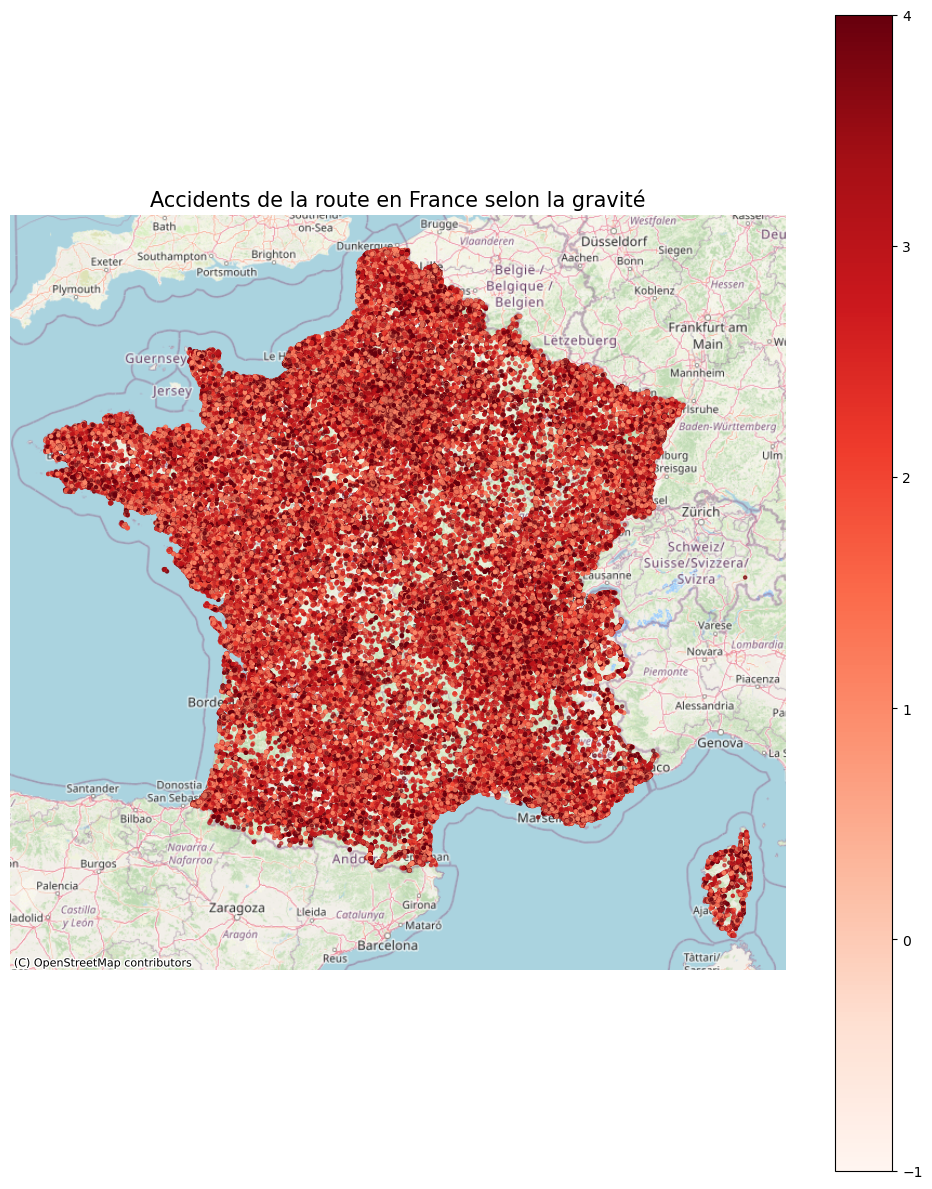

In [124]:
# --- 3. Filtrer la France métropolitaine ---
df = df[(df["lat"] >= 41) & (df["lat"] <= 51)]
df = df[(df["long"] >= -5) & (df["long"] <= 10)]

# --- 4. Créer GeoDataFrame ---
geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Reprojection pour fond OSM (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# --- 5. Plot carte ---
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(ax=ax, column="grav", cmap="Reds", markersize=5, alpha=0.6, legend=True)

# Ajouter fond de carte OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# --- 6. Ajuster figure et axes ---
ax.set_axis_off()
plt.tight_layout()
plt.title("Accidents de la route en France selon la gravité", fontsize=15)
plt.show()

# Feature Engineering 
## 1. Définition de la variable cible (gravité au niveau accident)

Avant de construire la table finale (1 ligne = 1 accident), il est indispensable de **définir précisément la variable cible** que l’on souhaite prédire.

Dans la table `df`, la variable `grav` correspond à la **gravité de blessure de l’usager**. Cette variable est codée (valeurs discrètes) et peut prêter à confusion si l’on ne vérifie pas sa signification.

D’après la documentation officielle ONISR (BAAC — *Description des bases de données annuelles*), on a :

- `grav = 1` : **Indemne**
- `grav = 2` : **Tué**
- `grav = 3` : **Blessé hospitalisé**
- `grav = 4` : **Blessé léger**

Source : ONISR — *Description des bases de données annuelles* (document de référence du fichier BAAC).

### Choix métier pour la cible

L’objectif métier du projet est d’identifier rapidement, dès l’appel aux secours et/ou à l’arrivée des premiers intervenants, si un accident présente une gravité élevée.

Ainsi, nous définissons un accident comme **grave** si au moins un usager est :
- **tué** (`grav = 2`) ou
- **blessé hospitalisé** (`grav = 3`)

Autrement dit, la cible binaire au niveau accident est :

- `grav_acc = 1` si ∃ usager avec `grav ∈ {2,3}`
- `grav_acc = 0` sinon (indemnes et/ou blessés légers uniquement)

Avant de figer cette définition, nous vérifions la cohérence avec les données (répartition de `grav` et proportion d’accidents graves obtenue selon plusieurs règles).


In [292]:
# ============================================================
# 4. Feature Engineering — Définition & vérification de la cible
# ============================================================

# import pandas as pd

print("=== Vérification de la variable grav (table df) ===")

# 1) Distribution de grav au niveau usager
grav_counts = df["grav"].value_counts(dropna=False).sort_index()
grav_pct = df["grav"].value_counts(normalize=True, dropna=False).mul(100).round(2).sort_index()

print("\nDistribution de grav (df) :")
print(grav_counts)
print("\nEn % :")
print(grav_pct)

# 2) Distribution de grav_max par accident (permet de voir la 'gravité max' observée dans chaque accident)
grav_max = df.groupby("num_acc")["grav"].max()
grav_max_counts = grav_max.value_counts().sort_index()
grav_max_pct = grav_max.value_counts(normalize=True).mul(100).round(2).sort_index()

print("\nDistribution de grav_max par accident :")
print(grav_max_counts)
print("\nEn % :")
print(grav_max_pct)

# 3) Comparaison de plusieurs définitions possibles de "accident grave"
#    (utile pour vérifier qu'une règle ne rend pas 95% des accidents "graves" par erreur de codage)
print("\n=== Tests de définitions (taux d'accidents graves en %) ===")

grav_list_per_acc = df.groupby("num_acc")["grav"].apply(list)

def taux_grave(cond):
    return grav_list_per_acc.apply(cond).mean() * 100

tests = {
    "grave si grav in {2,3} (tué ou hospitalisé)" : lambda L: any(g in [2, 3] for g in L),
    "grave si grav in {2} (tué)"                  : lambda L: any(g == 2 for g in L),
    "grave si grav in {3} (hospitalisé)"          : lambda L: any(g == 3 for g in L),
}

for name, fn in tests.items():
    print(f"{name} : {taux_grave(fn):.2f}")

# Définition finale retenue (métier) : grave = tué ou hospitalisé
print("\n=== Définition retenue pour la cible ===")
print("grav_acc = 1 si au moins un usager a grav ∈ {2,3}, sinon 0")

=== Vérification de la variable grav (table df) ===

Distribution de grav (df) :
grav
1    348299
2     20880
3    123399
4    327378
Name: count, dtype: int64

En % :
grav
1    42.48
2     2.55
3    15.05
4    39.93
Name: proportion, dtype: float64

Distribution de grav_max par accident :
grav
2     13114
3     83061
4    231453
Name: count, dtype: int64

En % :
grav
2     4.00
3    25.35
4    70.65
Name: proportion, dtype: float64

=== Tests de définitions (taux d'accidents graves en %) ===
grave si grav in {2,3} (tué ou hospitalisé) : 35.82
grave si grav in {2} (tué) : 5.71
grave si grav in {3} (hospitalisé) : 31.07

=== Définition retenue pour la cible ===
grav_acc = 1 si au moins un usager a grav ∈ {2,3}, sinon 0


In [294]:
# Creation de la variable cible

df["is_grave_usager"] = df["grav"].isin([2, 3]).astype(int)

target_acc = (
    df.groupby("num_acc")["is_grave_usager"]
    .max()
    .reset_index()
    .rename(columns={"is_grave_usager": "grav_acc"})
)

print("\nRépartition de grav_acc (accidents) :")
print(target_acc["grav_acc"].value_counts())
print("\nEn % :")
print(target_acc["grav_acc"].value_counts(normalize=True).mul(100).round(2))


Répartition de grav_acc (accidents) :
grav_acc
0    210269
1    117359
Name: count, dtype: int64

En % :
grav_acc
0    64.18
1    35.82
Name: proportion, dtype: float64


## 2.  Agrégations des usagers (niveau accident)
Objectif : construire des variables réalistes et disponibles rapidement (témoignage / premiers secours), au niveau accident (1 ligne = 1 accident).

Nous ne conservons pas des statistiques trop fines (âge moyen, médiane, etc.) car elles sont peu réalistes à connaître immédiatement. À la place, nous construisons des indicateurs simples :

* nombre total d'df impliqués
* nombre d'hommes / femmes
* présence de piéton
* présence d'enfant (âge < 14)
* présence de senior (âge ≥ 65)
Avant cela, on vérifie rapidement le codage de catu (catégorie usager) pour identifier la modalité correspondant aux piétons.


In [296]:

# ============================================================
# 5. Agrégations df : vérification du codage + agrégation
# ============================================================

print("=== Vérification du codage de catu (catégorie usager) ===")
print(df["catu"].value_counts(dropna=False).sort_index().head(20))

# IMPORTANT :
# Le code "piéton" peut varier selon le dictionnaire.
# Par défaut, on suppose catu == 3 = piéton (à confirmer avec le dictionnaire ou le prof).
# Si besoin, tu ajusteras la valeur ici :
CATU_PIETON = 3

# Indicateurs simples et "terrain"
df["is_homme"] = (df["sexe"] == 1).astype(int)
df["is_femme"] = (df["sexe"] == 2).astype(int)

df["is_pieton"] = (df["catu"] == CATU_PIETON).astype(int)
df["is_enfant"] = (df["age"] < 14).astype(int)
df["is_senior"] = (df["age"] >= 65).astype(int)

# Agrégation au niveau accident
df_agg1 = df.groupby("num_acc").agg(
    nb_usager=("id_usager", "count"),
    nb_hommes=("is_homme", "sum"),
    nb_femmes=("is_femme", "sum"),
    presence_pieton=("is_pieton", "max"),
    presence_enfant=("is_enfant", "max"),
    presence_senior=("is_senior", "max"),
).reset_index()

print("\n=== Aperçu agrégations df ===")
print(df_agg1.head())

=== Vérification du codage de catu (catégorie usager) ===
catu
1    610509
2    146651
3     62796
Name: count, dtype: int64

=== Aperçu agrégations df ===
        num_acc  nb_usager  nb_hommes  nb_femmes  presence_pieton  \
0  201900000001          0          1          2                0   
1  201900000002          0          0          1                0   
2  201900000003          0          3          1                0   
3  201900000004          0          3          1                0   
4  201900000005          0          3          0                0   

   presence_enfant  presence_senior  
0                0                1  
1                0                0  
2                0                1  
3                0                0  
4                0                0  


## 3. Agrégations des vehicules (niveau accident)
Objectif : décrire rapidement l'accident via des informations plausibles au moment de l'appel :

* nombre de véhicules impliqués
* présence de grandes familles de véhicules (voiture, 2RM, vélo, poids lourd, transport en commun)  

Pour cela, on utilise la variable catv (catégorie de véhicule) et on la regroupe en grandes familles. Comme le mapping dépend du dictionnaire BAAC, on commence par :

1. afficher les valeurs les plus fréquentes de `catv`
2. définir un dictionnaire de mapping simple

In [298]:
# ============================================================
# 6. Agrégations véhicules : nb_df + préparation mapping
# ============================================================

print("=== Top catégories catv ===")
print(df["catv"].value_counts(dropna=False).head(25))

# 1) Nombre de véhicules distincts par accident
df_agg2 = df.groupby("num_acc").agg(
    nb_df=("id_vehicule", "nunique")
).reset_index()

print("\n=== Aperçu nb_df ===")
print(df_agg2.head())

=== Top catégories catv ===
catv
7     512688
10     57549
33     55547
1      37882
2      26492
30     21339
32     15915
50     14633
31     12466
37      8425
34      7726
15      6229
14      5333
3       4971
80      4548
43      4309
17      4098
99      3499
38      3385
13      3002
0       1914
21      1833
60      1533
36      1441
40      1285
Name: count, dtype: int64

=== Aperçu nb_df ===
        num_acc  nb_df
0  201900000001      2
1  201900000002      1
2  201900000003      3
3  201900000004      3
4  201900000005      2


In [300]:
# ============================================================
# Présence de familles de véhicules (mapping OFFICIEL BAAC)
# ============================================================

MAP_CATV_TO_FAM = {
    # Vélo
    "velo": set([1, 80]),

    # 2 roues motorisés (scooters/motos)
    "2rm": set([30, 31, 32, 33, 34]),

    # 3 roues motorisés / quads
    "3rm_quad": set([35, 36, 41, 42, 43]),

    # Véhicules légers (voiture) + utilitaires légers
    "vl_vu": set([7, 10]),

    # Poids lourds / tracteurs routiers
    "pl": set([13, 14, 15, 16, 17]),

    # Transport collectif (bus, autocar, tramway)
    "tc": set([37, 38, 40]),

    # Engins de déplacement personnel
    "edp": set([50, 60]),
}

veh_tmp = df[["num_acc", "id_vehicule", "catv"]].copy()

# Flags par véhicule
veh_tmp["is_velo"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["velo"]).astype(int)
veh_tmp["is_2rm"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["2rm"]).astype(int)
veh_tmp["is_3rm_quad"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["3rm_quad"]).astype(int)
veh_tmp["is_vl_vu"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["vl_vu"]).astype(int)
veh_tmp["is_pl"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["pl"]).astype(int)
veh_tmp["is_tc"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["tc"]).astype(int)
veh_tmp["is_edp"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["edp"]).astype(int)

# Agrégation au niveau accident : présence si au moins un véhicule de la famille
veh_fam_agg = veh_tmp.groupby("num_acc").agg(
    presence_velo=("is_velo", "max"),
    presence_2rm=("is_2rm", "max"),
    presence_3rm_quad=("is_3rm_quad", "max"),
    presence_vl_vu=("is_vl_vu", "max"),
    presence_pl=("is_pl", "max"),
    presence_tc=("is_tc", "max"),
    presence_edp=("is_edp", "max"),
).reset_index()

# Merge avec nb_df
df_agg2= df_agg2.merge(veh_fam_agg, on="num_acc", how="left")

print("=== Aperçu df_agg (nb véhicules + familles) ===")
print(df_agg2.head())

print("\nRépartition des présences (en %) :")
cols_presence = [c for c in df_agg2.columns if c.startswith("presence_")]
print((df_agg2[cols_presence].mean().mul(100).round(2)).sort_values(ascending=False))


=== Aperçu df_agg (nb véhicules + familles) ===
        num_acc  nb_df  presence_velo  presence_2rm  presence_3rm_quad  \
0  201900000001      2              0             0                  0   
1  201900000002      1              0             0                  0   
2  201900000003      3              0             0                  0   
3  201900000004      3              0             0                  0   
4  201900000005      2              0             0                  0   

   presence_vl_vu  presence_pl  presence_tc  presence_edp  
0               1            1            0             0  
1               1            0            0             0  
2               1            0            0             0  
3               1            0            0             0  
4               1            0            0             0  

Répartition des présences (en %) :
presence_vl_vu       81.62
presence_2rm         26.21
presence_velo        10.05
presence_pl           4.52
pre

# 4. Agrégation des lieux (niveau accident)

La table `lieux` peut contenir plusieurs lignes par accident.  
On agrège par accident en conservant des variables simples et plausibles rapidement :

- vma (vitesse max) : modalité la plus fréquente (mode)
- nbv (nombre de voies) : mode
- catr, circ, surf : mode
- presence_bande_cyclable : max (présence si au moins une ligne le signale)


In [307]:


# ============================================================
# 7. Agrégation df : mode + max
# ============================================================

def mode_series(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) > 0 else np.nan

df_agg3 = df.groupby("num_acc").agg(
    vma=("vma", mode_series),
    nbv=("nbv", mode_series),
    catr=("catr", mode_series),
    circ=("circ", mode_series),
    surf=("surf", mode_series),
    presence_bande_cyclable=("presence_bande_cyclable", "max"),
).reset_index()

print("=== Aperçu df_agg ===")
print(df_agg3.head())

print("\nNA dans df_agg (top) :")
print(df_agg3.isna().sum().sort_values(ascending=False).head(10))

=== Aperçu df_agg ===
        num_acc  vma  nbv  catr  circ  surf  presence_bande_cyclable
0  201900000001   70  NaN     1     3     1                        0
1  201900000002   70  NaN     1     1     1                        0
2  201900000003   90  NaN     1     3     1                        0
3  201900000004   90  NaN     1     3     1                        0
4  201900000005   90  NaN     1     1     1                        0

NA dans df_agg (top) :
nbv                        163102
num_acc                         0
vma                             0
catr                            0
circ                            0
surf                            0
presence_bande_cyclable         0
dtype: int64


## 5. Caractéristiques des accidents

On conserve uniquement une information géographique générale : `dep` (département).
On dérive des variables temporelles réalistes : heure, jour de semaine, weekend, saison.
On conserve des variables de contexte disponibles rapidement : luminosité, météo, agglomération, intersection, type de collision.

In [309]:


# ============================================================
# FEATURES TEMPORELLES + CONTEXTE
# ============================================================

df_feat = df.copy()

# =========================
# HEURE
# =========================
df_feat["heure"] = (
    pd.to_numeric(
        df_feat["hrmn"].astype(str).str.slice(0, 2),
        errors="coerce"
    )
    .astype("Int64")
)

# =========================
# DATE (doit exister AVANT toute sélection)
# =========================
df_feat["date"] = pd.to_datetime(
    dict(
        year=pd.to_numeric(df_feat["an"], errors="coerce"),
        month=pd.to_numeric(df_feat["mois"], errors="coerce"),
        day=pd.to_numeric(df_feat["jour"], errors="coerce"),
    ),
    errors="coerce"
)

df_feat["jour_semaine"] = df_feat["date"].dt.dayofweek
df_feat["weekend"] = df_feat["jour_semaine"].isin([5, 6]).astype(int)
# =========================
# SAISON
# =========================
def saison(m):
    if m in (12, 1, 2):
        return "hiver"
    elif m in (3, 4, 5):
        return "printemps"
    elif m in (6, 7, 8):
        return "ete"
    else:
        return "automne"

df_feat["saison"] = df_feat["mois"].apply(saison)

# =========================
# SELECTION FINALE (APRES features)
# =========================
df_keep = [
    "num_acc",
    "annee",
    "dep",
    "heure",
    "jour_semaine",
    "weekend",
    "saison",
    "lum",
    "atm",
    "col",
]

df_feat = df_feat[df_keep].copy()

# =========================
# CONTROLES
# =========================
print("Colonnes finales :", df_feat.columns.tolist())
print(df_feat.head())

print("\nNA par colonne :")
print(df_feat.isna().sum().sort_values(ascending=False))


Colonnes finales : ['num_acc', 'annee', 'dep', 'heure', 'jour_semaine', 'weekend', 'saison', 'lum', 'atm', 'col']
        num_acc  annee dep  heure  jour_semaine  weekend   saison  lum  atm  \
0  201900000001   2019  93      1           5.0        1  automne  4.0  1.0   
1  201900000001   2019  93      1           5.0        1  automne  4.0  1.0   
2  201900000001   2019  93      1           5.0        1  automne  4.0  1.0   
3  201900000002   2019  93      2           5.0        1  automne  3.0  1.0   
4  201900000003   2019  92     15           3.0        0  automne  1.0  1.0   

   col  
0  2.0  
1  2.0  
2  2.0  
3  6.0  
4  4.0  

NA par colonne :
dep             126421
heure           126421
jour_semaine    126421
lum             126421
atm             126421
col             126421
num_acc              0
annee                0
weekend              0
saison               0
dtype: int64


# Construction de la table finale 

On assemble :
- `carac_feat` (temps + contexte)
- `lieux_agg` (infrastructure simple)
- `usagers_agg` (profils simples)
- `vehicules_agg` (nb véhicules + familles)
- `target_acc` (grav_acc)

Puis on réalise des imputations simples :
- variables `presence_*` : NA -> 0
- variables numériques simples (ex: vma) : NA -> médiane
- variables catégorielles : NA -> mode (ou "Inconnu" si besoin)


In [311]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [313]:
# ============================================================
# 1. Table finale
# ============================================================

df2 = (
    df_feat
    .merge(df_agg1, on="num_acc", how="left")
    .merge(df_agg2, on="num_acc", how="left")
    .merge(df_agg3, on="num_acc", how="left")
    .merge(target_acc, on="num_acc", how="left")
)

print("Doublons num_acc :", df2["num_acc"].duplicated().sum())

# ============================================================
# 2. Imputations métier
# ============================================================

# presence_* -> 0
presence_cols = [c for c in df2.columns if c.startswith("presence_")]
df2[presence_cols] = df2[presence_cols].fillna(0)

# nb_* -> 0
count_cols = [c for c in df2.columns if c.startswith("nb_")]
df2[count_cols] = df2[count_cols].fillna(0)

# vma -> médiane
if "vma" in df2.columns:
    df2["vma"] = df2["vma"].fillna(df2["vma"].median())

# ============================================================
# 3. Variables temporelles (CORRECT)
# ============================================================

# annee (numérique)
df2["annee"] = df2["annee"].fillna(df2["annee"].median())

# heure (cyclique)
df2["heure"] = df2["heure"].fillna(df2["heure"].median())
df2["heure_sin"] = np.sin(2 * np.pi * df2["heure"] / 24)
df2["heure_cos"] = np.cos(2 * np.pi * df2["heure"] / 24)
df2.drop(columns="heure", inplace=True)

# jour_semaine (cyclique)
df2["jour_semaine"] = df2["jour_semaine"].fillna(df2["jour_semaine"].median())
df2["jour_sin"] = np.sin(2 * np.pi * df2["jour_semaine"] / 7)
df2["jour_cos"] = np.cos(2 * np.pi * df2["jour_semaine"] / 7)
df2.drop(columns="jour_semaine", inplace=True)

# ============================================================
# 4. Séparation cible / features
# ============================================================

y = df2["grav_acc"]
X = df2.drop(columns=["grav_acc", "num_acc"])

# ============================================================
# 5. Forcer les catégorielles BAAC
# ============================================================

cat_cols = [
    "dep", "saison", "lum", "atm", "agg", "int",
    "col", "catr", "circ", "surf", "nbv",
    "weekend"
] + presence_cols

for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype("category")

# ============================================================
# 6. Séparation auto num / cat
# ============================================================

num_vars = X.select_dtypes(include=["int32","int64", "float64"]).columns.tolist()
cat_vars = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numériques :", num_vars)
print("Variables catégorielles :", cat_vars)

# ============================================================
# 7. Preprocessing pipeline
# ============================================================

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ],
    remainder="drop"
)

# ============================================================
# 8. Checks
# ============================================================

print("\nNA restants (top 15) :")
print(X.isna().sum().sort_values(ascending=False).head(15))

print("\nRépartition grav_acc (%) :")
print(y.value_counts(normalize=True).mul(100).round(2))


Doublons num_acc : 492328
Variables numériques : ['annee', 'nb_usager', 'nb_hommes', 'nb_femmes', 'nb_df', 'vma', 'heure_sin', 'heure_cos', 'jour_sin', 'jour_cos']
Variables catégorielles : ['dep', 'weekend', 'saison', 'lum', 'atm', 'col', 'presence_pieton', 'presence_enfant', 'presence_senior', 'presence_velo', 'presence_2rm', 'presence_3rm_quad', 'presence_vl_vu', 'presence_pl', 'presence_tc', 'presence_edp', 'nbv', 'catr', 'circ', 'surf', 'presence_bande_cyclable']

NA restants (top 15) :
nbv                        367460
dep                        126421
lum                        126421
atm                        126421
col                        126421
annee                           0
circ                            0
presence_edp                    0
vma                             0
catr                            0
presence_bande_cyclable         0
surf                            0
presence_pl                     0
heure_sin                       0
heure_cos                  

Les valeurs manquantes apparues après les jointures ont été traitées selon la nature des variables. Les variables binaires de présence (presence_*) ainsi que les variables de comptage (nb_*) ont été imputées à 0, ce choix traduisant l’absence d’un usager, d’un type de véhicule ou d’une caractéristique lorsque l’information n’est pas renseignée dans les tables sources. Les variables numériques continues (telles que l’année ou la vitesse maximale autorisée) ont été imputées par la médiane, une statistique robuste aux valeurs extrêmes, afin de ne pas biaiser la distribution. Enfin, les variables catégorielles ont été imputées par leur modalité la plus fréquente, ce qui permet de conserver une cohérence avec la structure globale des données sans introduire de catégories artificielles. Ces choix, fondés à la fois sur la logique métier des données accidentologiques et sur les bonnes pratiques en apprentissage automatique, permettent d’obtenir un jeu de données complet, cohérent et directement exploitable pour la phase de modélisation.

# Modélisation

1. Préparation à la modélisation

Avant de construire les modèles de prédiction, il est indispensable de préparer correctement les données. Cette étape commence par la séparation entre la variable cible (grav_acc, qui indique si un accident est grave ou non) et les variables explicatives. Ensuite les différentes colonnes du jeu de données sont classées selon leur type (numérique, catégoriel, booléen, date), car chaque type nécessite un traitement spécifique. Cette identification permet de définir une stratégie de prétraitement adaptée : imputation des valeurs manquantes, normalisation des variables numériques et encodage des variables catégorielles. L’ensemble de ces transformations est ensuite regroupé dans un ColumnTransformer garantissant un pipeline propre, reproductible et compatible avec les modèles de machine learning utilisés par la suite.

In [317]:

# ============================================================
# 1. Séparer cible et variables explicatives
# ============================================================

y = df2["grav_acc"]
X = df2.drop(columns=["grav_acc", "num_acc"])



# 2) Forcer les variables codées BAAC à être catégorielles (même si elles sont en int)
# (Ces colonnes sont des codes -> pas des valeurs numériques continues)
code_cols = ["lum", "atm", "agg", "int", "col", "catr", "circ", "surf", "nbv", "dep", "saison"]
for c in code_cols:
    if c in X.columns:
        X[c] = X[c].astype("category")

print("Variables numériques (scalées) :", num_vars)
print("Variables catégorielles (OneHot) :", cat_vars)


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ],
    remainder="drop"
)

preprocessor


Variables numériques (scalées) : ['annee', 'nb_usager', 'nb_hommes', 'nb_femmes', 'nb_df', 'vma', 'heure_sin', 'heure_cos', 'jour_sin', 'jour_cos']
Variables catégorielles (OneHot) : ['dep', 'weekend', 'saison', 'lum', 'atm', 'col', 'presence_pieton', 'presence_enfant', 'presence_senior', 'presence_velo', 'presence_2rm', 'presence_3rm_quad', 'presence_vl_vu', 'presence_pl', 'presence_tc', 'presence_edp', 'nbv', 'catr', 'circ', 'surf', 'presence_bande_cyclable']


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['annee', 'nb_usager', 'nb_hommes',
                                  'nb_femmes', 'nb_df', 'vma', 'heure_sin',
                                  'heure_cos', 'jour_sin', 'jour_cos']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['dep', 'weekend', 'saison', 'lum', 'atm',
                                  'col', 'presence_pieton', 'presence_enfant',
                                  'presence_senior', 'presence_velo',
                                  'presence_2rm', 'presence_3rm_quad',
                                  'presence_vl_vu', 'presence_pl',
                                  'presence_tc', 'presence_edp', 'nbv', 'catr',
                                  'circ', 'surf', 'presence_bande_cyclable'])])

Avant l’entraînement des modèles, les données ont été séparées en deux ensembles distincts selon un critère temporel. Les accidents survenus entre 2019 et 2023 ont été utilisés comme ensemble d’entraînement, tandis que les données de l’année 2024 ont été réservées comme ensemble de test. Ce découpage chronologique permet d’évaluer les performances du modèle sur des données réellement futures par rapport à celles utilisées pour l’apprentissage, et constitue ainsi une approche plus réaliste de la capacité de généralisation du modèle. Il évite par ailleurs toute fuite d’information temporelle et reflète les conditions réelles d’utilisation du modèle. La distribution de la variable cible a été vérifiée afin de s’assurer que les proportions d’accidents graves et non graves restent comparables entre les deux ensembles, condition nécessaire à une évaluation fiable dans un contexte de classes modérément déséquilibrées.

In [325]:

# Split
df_train = df2[df2["annee"] < 2024].copy()
df_test  = df2[df2["annee"] == 2024].copy()


target = "grav_acc"

X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]



Afin de garantir une démarche rigoureuse et reproductible, chaque modèle de machine learning est intégré dans un pipeline combinant le prétraitement des données et l’algorithme de classification. Cette approche permet d’appliquer automatiquement les mêmes transformations (imputation, normalisation, encodage) aussi bien lors de l’entraînement que lors de la prédiction, évitant ainsi toute fuite d’information entre les étapes.

Compte tenu du volume très important du jeu de données, un échantillon représentatif de l’ensemble d’entraînement a été constitué afin de rendre les temps de calcul compatibles avec la recherche d’hyperparamètres. Cet échantillonnage a été réalisé de manière contrôlée, en veillant à conserver une distribution comparable de la variable cible, afin de ne pas altérer la structure des données.

Une fois les pipelines définis, une recherche d’hyperparamètres est menée à l’aide de GridSearchCV, qui évalue plusieurs configurations pour chaque modèle au moyen d’une validation croisée. Cette procédure permet d’identifier la combinaison d’hyperparamètres offrant les meilleures performances tout en limitant le risque de surapprentissage. Enfin, les modèles optimisés sont évalués sur l’ensemble de test afin de comparer leurs performances de manière équitable et d’identifier celui qui présente le meilleur compromis pour la prédiction de la gravité des accidents.

In [329]:

# ============================================================
# 0. ÉCHANTILLONNAGE (pour accélérer)
# ============================================================

N_SAMPLE = 30000  

X_train_small = X_train.sample(n=N_SAMPLE, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# ============================================================
# 1. Pipelines
# ============================================================

pipe_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipe_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipe_gb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# ============================================================
# 2. Paramètres
# ============================================================

param_logreg = {
    "classifier__C": [0.1, 1]
}

param_rf = {
    "classifier__n_estimators": [50],
    "classifier__max_depth": [10]
}

param_gb = {
    "classifier__n_estimators": [100],
    "classifier__learning_rate": [0.1]
}

# ============================================================
# 3. GridSearchCV
# ============================================================

grids = {
    "Logistic Regression": GridSearchCV(pipe_logreg, param_logreg, cv=3, scoring="recall", n_jobs=-1, verbose=1),
    "Random Forest": GridSearchCV(pipe_rf, param_rf, cv=3, scoring="recall", n_jobs=-1, verbose=1),
    "Gradient Boosting": GridSearchCV(pipe_gb, param_gb, cv=3, scoring="recall", n_jobs=-1, verbose=1)
}

results = {}

for name, grid in grids.items():
    print(f"\n Entraînement du modèle : {name}")
    grid.fit(X_train_small, y_train_small)
    results[name] = grid

# ============================================================
# 4. Évaluation sur le vrai X_test (pas échantillonné)
# ============================================================

for name, grid in results.items():
    print(f"\n=== {name} ===")
    print("Meilleurs hyperparamètres :", grid.best_params_)
    y_pred = grid.predict(X_test)
    print(classification_report(y_test, y_pred))



 Entraînement du modèle : Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits

 Entraînement du modèle : Random Forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Entraînement du modèle : Gradient Boosting
Fitting 3 folds for each of 1 candidates, totalling 3 fits

=== Logistic Regression ===
Meilleurs hyperparamètres : {'classifier__C': 1}
              precision    recall  f1-score   support

           0       0.79      0.84      0.81    107607
           1       0.64      0.57      0.60     54941

    accuracy                           0.75    162548
   macro avg       0.72      0.70      0.71    162548
weighted avg       0.74      0.75      0.74    162548


=== Random Forest ===
Meilleurs hyperparamètres : {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.74      0.93      0.82    107607
           1       0.72      0.35      0.47     54941

    accu


=== Matrice de confusion : Logistic Regression ===


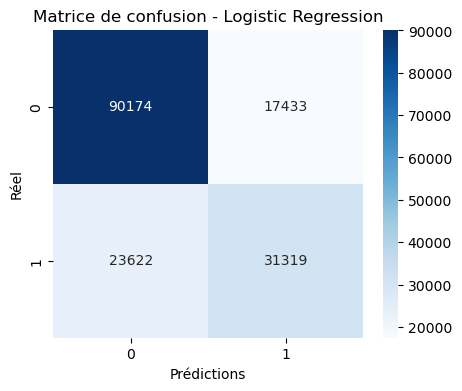


=== Matrice de confusion : Random Forest ===


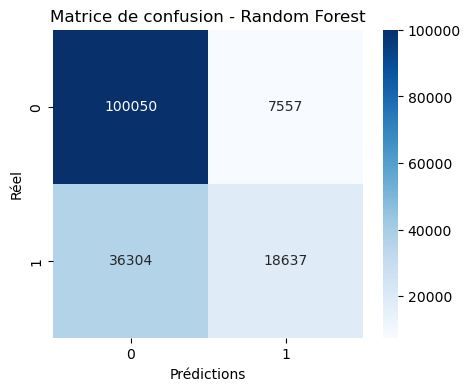


=== Matrice de confusion : Gradient Boosting ===


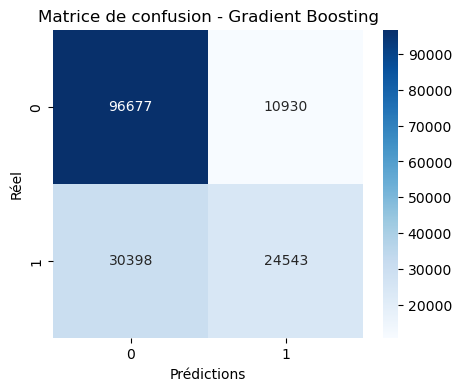

In [213]:
#***Matrice de confusion
for name, grid in results.items():
    print(f"\n=== Matrice de confusion : {name} ===")
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()

In [215]:
#***ROC-AUC
for name, grid in results.items():
    # Probabilité d'appartenir à la classe 1
    y_proba = grid.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} - ROC-AUC :", auc)

Logistic Regression - ROC-AUC : 0.7888270266773316
Random Forest - ROC-AUC : 0.77558449229093
Gradient Boosting - ROC-AUC : 0.7924594508237236


In [216]:
#***Analyse des faux négatifs car les plus critiques
for name, grid in results.items():
    print(f"\n=== Faux négatifs pour : {name} ===")
    y_pred = grid.predict(X_test)

    # Indices des faux négatifs
    fn_indices = (y_test == 1) & (y_pred == 0)

    # Extraction des lignes correspondantes
    faux_negatifs = X_test[fn_indices]

    print(f"Nombre de faux négatifs : {faux_negatifs.shape[0]}")
    display(faux_negatifs.head())


=== Faux négatifs pour : Logistic Regression ===
Nombre de faux négatifs : 23622


,num_acc,annee,dep,heure,jour_semaine,weekend,saison,lum,atm,col,...,presence_vl_vu,presence_pl,presence_tc,presence_edp,vma,nbv,catr,circ,surf,presence_bande_cyclable
657414,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0
657415,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0
657416,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0
657417,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0
657418,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0



=== Faux négatifs pour : Random Forest ===
Nombre de faux négatifs : 36304


,num_acc,annee,dep,heure,jour_semaine,weekend,saison,lum,atm,col,...,presence_vl_vu,presence_pl,presence_tc,presence_edp,vma,nbv,catr,circ,surf,presence_bande_cyclable
657410,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657411,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657412,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657413,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657414,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0



=== Faux négatifs pour : Gradient Boosting ===
Nombre de faux négatifs : 30398


,num_acc,annee,dep,heure,jour_semaine,weekend,saison,lum,atm,col,...,presence_vl_vu,presence_pl,presence_tc,presence_edp,vma,nbv,catr,circ,surf,presence_bande_cyclable
657410,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657411,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657412,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657413,202400000002,2024,21,15,2.0,0,printemps,1.0,7.0,6.0,...,1,0,0,0,30,1,4,1,9,0
657414,202400000003,2024,15,19,4.0,0,printemps,2.0,1.0,6.0,...,0,0,0,0,50,2,4,2,1,0


In [219]:
# Modèle retenu : Logistic Regression
best_est = results["Logistic Regression"].best_estimator_

# Probabilités pour la classe 1 (accident grave)
proba = best_est.predict_proba(X_test)[:, 1]

print("=== Analyse métier : ajustement du seuil (compromis recall vs fausses alertes) ===")
for t in [0.5, 0.4, 0.3, 0.2]:
    y_pred_t = (proba >= t).astype(int)
    r = recall_score(y_test, y_pred_t)
    cm = confusion_matrix(y_test, y_pred_t)
    print(f"Seuil={t:.1f} | Recall grave={r:.3f} | Matrice={cm.tolist()}")


=== Analyse métier : ajustement du seuil (compromis recall vs fausses alertes) ===
Seuil=0.5 | Recall grave=0.570 | Matrice=[[90174, 17433], [23622, 31319]]
Seuil=0.4 | Recall grave=0.683 | Matrice=[[81541, 26066], [17397, 37544]]
Seuil=0.3 | Recall grave=0.790 | Matrice=[[69960, 37647], [11549, 43392]]
Seuil=0.2 | Recall grave=0.883 | Matrice=[[52127, 55480], [6435, 48506]]


In [221]:
# seuil final choisi
seuil_final = 0.4
y_pred_final = (proba >= seuil_final).astype(int)

print("\nSeuil final retenu :", seuil_final)
print("Recall grave final :", recall_score(y_test, y_pred_final))
print("Matrice de confusion finale :", confusion_matrix(y_test, y_pred_final).tolist())


Seuil final retenu : 0.4
Recall grave final : 0.6833512313208715
Matrice de confusion finale : [[81541, 26066], [17397, 37544]]


In [223]:
#***Identifier les variables les plus influentes
best_pipe = results["Random Forest"].best_estimator_   # ou un autre modèle
ohe = best_pipe.named_steps["preprocessing"].named_transformers_["cat"].named_steps["encoder"]

encoded_cat_cols = ohe.get_feature_names_out(cat_vars)
all_features = list(num_vars) + list(encoded_cat_cols)

print("Nombre total de variables après prétraitement :", len(all_features))

Nombre total de variables après prétraitement : 201


In [225]:
#***Importance des variables - Random Forest
rf = results["Random Forest"].best_estimator_.named_steps["classifier"]

importances_rf = pd.DataFrame({
    "variable": all_features,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print("=== Importance des variables - Random Forest ===")
display(importances_rf.head(20))

=== Importance des variables - Random Forest ===


,variable,importance
18,vma,0.163539
180,catr_3,0.089518
181,catr_4,0.087887
188,circ_2,0.082770
187,circ_1,0.040378
10,nb_df,0.033927
9,presence_senior,0.029620
156,col_1.0,0.024149
121,dep_92,0.022597
157,col_2.0,0.018618


In [227]:
#***Importance des variablces - Gradient Boosting
gb = results["Gradient Boosting"].best_estimator_.named_steps["classifier"]

importances_gb = pd.DataFrame({
    "variable": all_features,
    "importance": gb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("=== Importance des variables - Gradient Boosting ===")
display(importances_gb.head(20))

=== Importance des variables - Gradient Boosting ===


,variable,importance
18,vma,0.248623
180,catr_3,0.152037
188,circ_2,0.088411
10,nb_df,0.056874
181,catr_4,0.041590
122,dep_93,0.033016
121,dep_92,0.032875
9,presence_senior,0.032601
123,dep_94,0.030765
12,presence_2rm,0.028307


In [229]:
#***Coefficients de la régression logistique
logreg = results["Logistic Regression"].best_estimator_.named_steps["classifier"]

coef_logreg = pd.DataFrame({
    "variable": all_features,
    "coefficient": logreg.coef_[0]
}).sort_values(by="coefficient", ascending=False)

print("=== Coefficients - Régression Logistique ===")
display(coef_logreg.head(20))
display(coef_logreg.tail(20))

=== Coefficients - Régression Logistique ===


,variable,coefficient
133,dep_987,2.357986
78,dep_53,2.052720
97,dep_70,1.463602
70,dep_46,1.150640
131,dep_978,1.069916
112,dep_84,1.038651
71,dep_47,0.958995
59,dep_36,0.935218
119,dep_90,0.885371
113,dep_85,0.858099


,variable,coefficient
79,dep_54,-0.615669
157,col_2.0,-0.620044
74,dep_5,-0.645115
49,dep_29,-0.655662
105,dep_78,-0.662889
50,dep_2A,-0.709380
90,dep_64,-0.721271
178,catr_1,-0.724788
95,dep_69,-0.762207
51,dep_2B,-0.781887
